In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import os
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Function to prepare the dataframe
def prep_df(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    # Extract image paths and labels
    data = [(line.strip(), line.strip().split('/')[0]) for line in lines]
    df = pd.DataFrame(data, columns=['path', 'label'])
    return df

# Load metadata
train_imgs = prep_df('/Users/Barbara/Desktop/Ironhack/Final_Project/final-project/MachineLearning/food-101/meta/train.txt')
test_imgs = prep_df('/Users/Barbara/Desktop/Ironhack/Final_Project/final-project/MachineLearning/food-101/meta/test.txt')

train_imgs = train_imgs.sample(n=5000)
test_imgs = test_imgs.sample(n=1000)

# Define paths
base_path = '/Users/Barbara/Desktop/Ironhack/Final_Project/final-project/MachineLearning/food-101/images'

# Helper function to load and preprocess images
def load_and_preprocess_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [150, 150])
    img = img / 255.0  # Normalize to [0,1] range
    return img

# Helper function to get image paths and labels
def get_image_paths_and_labels(df):
    img_paths = [os.path.join(base_path, path + '.jpg') for path in df['path'].values]
    labels = df['label'].astype('category').cat.codes.values
    return img_paths, labels

# Get image paths and labels
train_img_paths, train_labels = get_image_paths_and_labels(train_imgs)
test_img_paths, test_labels = get_image_paths_and_labels(test_imgs)

# Create TensorFlow datasets
train_ds = tf.data.Dataset.from_tensor_slices((train_img_paths, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_img_paths, test_labels))

# Map the load_and_preprocess_image function to the datasets
train_ds = train_ds.map(lambda x, y: (load_and_preprocess_image(x), y))
test_ds = test_ds.map(lambda x, y: (load_and_preprocess_image(x), y))

# Shuffle and batch the datasets
train_ds = train_ds.shuffle(buffer_size=len(train_ds)).batch(32)
test_ds = test_ds.batch(32)

# Create a more complex CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_imgs['label'].unique()), activation='softmax')  # Adjust the output layer to match your number of classes
])

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Add early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

# Train the model
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=50,  # Increase the number of epochs
    callbacks=[early_stopping, model_checkpoint]
)

# Save the model in the native Keras format
model.save('food_recognition_model.keras')

Epoch 1/50


2024-07-07 13:08:33.875583: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-07-07 13:08:33.875602: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-07-07 13:08:33.875607: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-07-07 13:08:33.875639: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-07 13:08:33.875650: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Applications/Utilities/anaconda3/envs/tensorflow_macos/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0116 - loss: 4.6169

KeyboardInterrupt: 

In [3]:
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

NameError: name 'model' is not defined

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import os
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Function to prepare the dataframe
def prep_df(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    # Extract image paths and labels
    data = [(line.strip(), line.strip().split('/')[0]) for line in lines]
    df = pd.DataFrame(data, columns=['path', 'label'])
    return df

# Load metadata
train_imgs = prep_df('/Users/Barbara/Desktop/Ironhack/Final_Project/final-project/food-101/meta/train.txt')
test_imgs = prep_df('/Users/Barbara/Desktop/Ironhack/Final_Project/final-project/food-101/meta/test.txt')

train_imgs = train_imgs.sample(n=5000)
test_imgs = test_imgs.sample(n=1000)

# Define paths
base_path = '/Users/Barbara/Desktop/Ironhack/Final_Project/final-project/food-101/images'

# Helper function to load and preprocess images
def load_and_preprocess_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [150, 150])
    img = img / 255.0  # Normalize to [0,1] range
    return img

# Helper function to get image paths and labels
def get_image_paths_and_labels(df):
    img_paths = [os.path.join(base_path, path + '.jpg') for path in df['path'].values]
    labels = df['label'].astype('category').cat.codes.values
    return img_paths, labels

# Get image paths and labels
train_img_paths, train_labels = get_image_paths_and_labels(train_imgs)
test_img_paths, test_labels = get_image_paths_and_labels(test_imgs)

# Create TensorFlow datasets
train_ds = tf.data.Dataset.from_tensor_slices((train_img_paths, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_img_paths, test_labels))

# Map the load_and_preprocess_image function to the datasets
train_ds = train_ds.map(lambda x, y: (load_and_preprocess_image(x), y))
test_ds = test_ds.map(lambda x, y: (load_and_preprocess_image(x), y))

# Shuffle and batch the datasets
train_ds = train_ds.shuffle(buffer_size=len(train_ds)).batch(32)
test_ds = test_ds.batch(32)

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create a more complex CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_imgs['label'].unique()), activation='softmax')  # Adjust the output layer to match your number of classes
])

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Add early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

# Train the model
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=50,  # Increase the number of epochs
    callbacks=[early_stopping, model_checkpoint]
)

# Save the model in the native Keras format
model.save('food_recognition_model.keras')

Epoch 1/50


/Applications/Utilities/anaconda3/envs/tensorflow_macos/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.0123 - loss: 4.6149 - val_accuracy: 0.0180 - val_loss: 4.5984
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.0278 - loss: 4.5389 - val_accuracy: 0.0530 - val_loss: 4.4075
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.0627 - loss: 4.2818 - val_accuracy: 0.0640 - val_loss: 4.2964
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.0903 - loss: 4.0571 - val_accuracy: 0.0840 - val_loss: 4.2115
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.1277 - loss: 3.8373 - val_accuracy: 0.0890 - val_loss: 4.2198
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.1863 - loss: 3.5307 - val_accuracy: 0.0930 - val_loss: 4.2565
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.2598 - loss: 3.1571 - val_accuracy: 0.0840 - val_loss: 4.4390
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.3425 - loss: 2.7245 - val_accuracy: 0.089

Found 4000 validated image filenames belonging to 101 classes.
Found 1000 validated image filenames belonging to 101 classes.
Found 1000 validated image filenames belonging to 101 classes.


/Applications/Utilities/anaconda3/envs/tensorflow_macos/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-07-07 13:17:42.319986: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-07-07 13:17:42.320002: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-07-07 13:17:42.320007: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-07-07 13:17:42.320022: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-07 13:17:42.320032: I tensorflow/core/common_runtime/pluggable_d

Epoch 1/50


2024-07-07 13:17:53.651725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/Applications/Utilities/anaconda3/envs/tensorflow_macos/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-07-07 13:18:10.317917: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 2 of 8
2024-07-07 13:18:24.834814: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-07-07 13:18:39.035988: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV

125/125 ━━━━━━━━━━━━━━━━━━━━ 1013s 8s/step - accuracy: 0.0150 - loss: 4.6195 - val_accuracy: 0.0120 - val_loss: 4.5989
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 148ms/step - accuracy: 0.0210 - loss: 4.5769 - val_accuracy: 0.0230 - val_loss: 4.5285
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 144ms/step - accuracy: 0.0236 - loss: 4.5006 - val_accuracy: 0.0270 - val_loss: 4.4465
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 142ms/step - accuracy: 0.0417 - loss: 4.3890 - val_accuracy: 0.0480 - val_loss: 4.3720
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 138ms/step - accuracy: 0.0511 - loss: 4.2840 - val_accuracy: 0.0490 - val_loss: 4.3207
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 138ms/step - accuracy: 0.0596 - loss: 4.2398 - val_accuracy: 0.0590 - val_loss: 4.3040
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 139ms/step - accuracy: 0.0722 - loss: 4.1546 - val_accuracy: 0.0570 - val_loss: 4.3557
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 143ms/step - accuracy: 0.0820 - loss: 4.1352 - val_

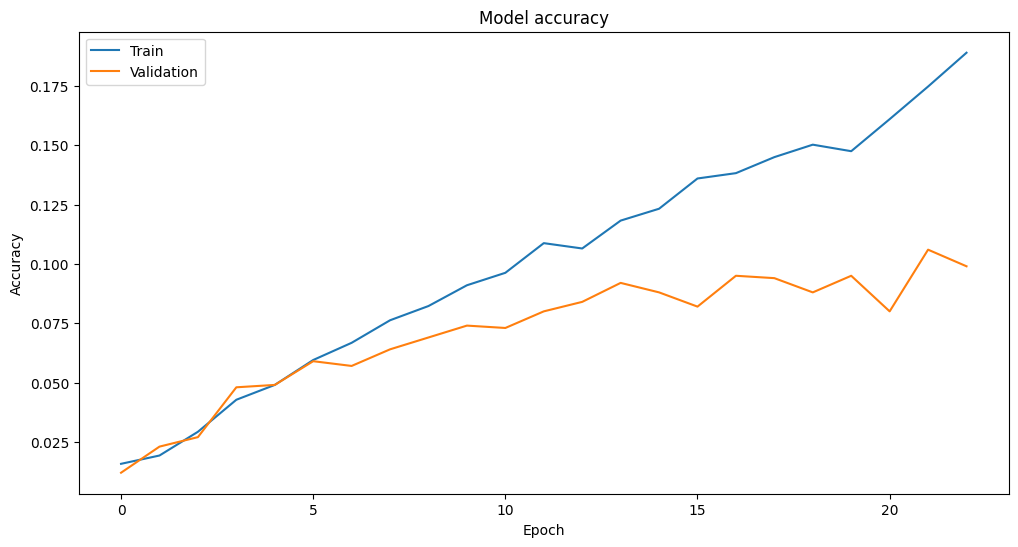

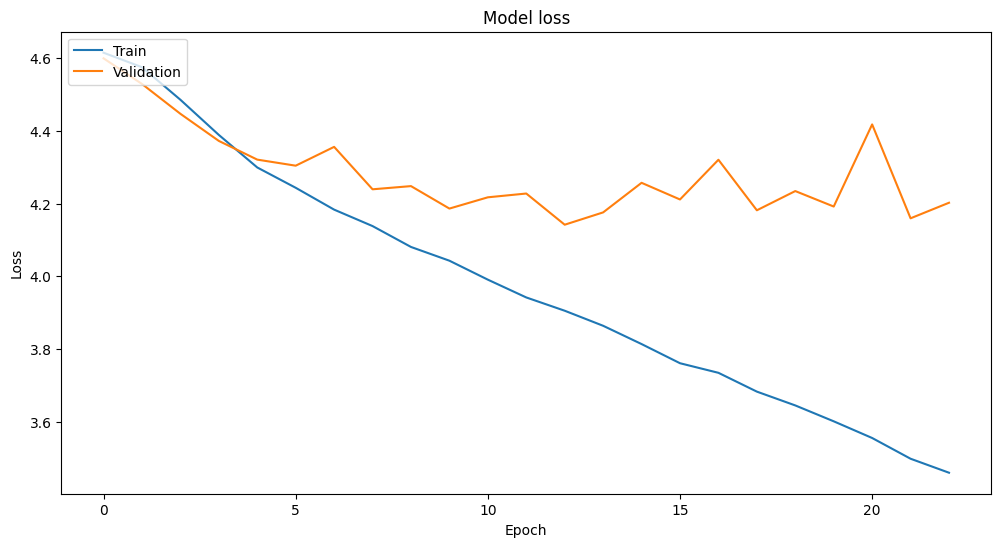

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import os
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Function to prepare the dataframe
def prep_df(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    # Extract image paths and labels
    data = [(line.strip(), line.strip().split('/')[0]) for line in lines]
    df = pd.DataFrame(data, columns=['path', 'label'])
    return df

# Load metadata
train_imgs = prep_df('/Users/Barbara/Desktop/Ironhack/Final_Project/final-project/MachineLearning/food-101/meta/train.txt')
test_imgs = prep_df('/Users/Barbara/Desktop/Ironhack/Final_Project/final-project/MachineLearning/food-101/meta/test.txt')

# Sample data for quick iteration (optional, remove if full dataset is used)
train_imgs = train_imgs.sample(n=5000)
test_imgs = test_imgs.sample(n=1000)

# Split train data into train and validation sets
val_imgs = train_imgs.sample(frac=0.2)
train_imgs = train_imgs.drop(val_imgs.index)

# Define paths
base_path = '/Users/Barbara/Desktop/Ironhack/Final_Project/final-project/MachineLearning/food-101/images'

# Helper function to create full image paths
def get_full_paths(df):
    df['path'] = df['path'].apply(lambda x: os.path.join(base_path, x + '.jpg'))
    return df

train_imgs = get_full_paths(train_imgs)
val_imgs = get_full_paths(val_imgs)
test_imgs = get_full_paths(test_imgs)

# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_dataframe(
    train_imgs,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

val_generator = val_datagen.flow_from_dataframe(
    val_imgs,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_dataframe(
    test_imgs,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# Create a more complex CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_imgs['label'].unique()), activation='softmax')  # Adjust the output layer to match your number of classes
])

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Add early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stopping, model_checkpoint]
)

# Save the model in the native Keras format
model.save('food_recognition_model.keras')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image

# Function to prepare the dataframe
def prep_df(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    # Extract image paths and labels
    data = [(line.strip(), line.strip().split('/')[0]) for line in lines]
    df = pd.DataFrame(data, columns=['path', 'label'])
    return df

# Load metadata
train_imgs = prep_df('/Users/Barbara/Desktop/Ironhack/Final_Project/final-project/MachineLearning/food-101/meta/train.txt')
test_imgs = prep_df('/Users/Barbara/Desktop/Ironhack/Final_Project/final-project/MachineLearning/food-101/meta/test.txt')

# Sample data for quick iteration (optional, remove if full dataset is used)
train_imgs = train_imgs.sample(n=5000)
test_imgs = test_imgs.sample(n=1000)

# Split train data into train and validation sets
val_imgs = train_imgs.sample(frac=0.2)
train_imgs = train_imgs.drop(val_imgs.index)

# Define paths
base_path = '/Users/Barbara/Desktop/Ironhack/Final_Project/final-project/MachineLearning/food-101/images'

# Verify image paths
def verify_image_paths(df, base_path):
    valid_extensions = ('.jpg', '.jpeg', '.png')
    valid_paths = []
    for path in df['path']:
        full_path = os.path.join(base_path, path)
        if os.path.isfile(full_path) and full_path.lower().endswith(valid_extensions):
            valid_paths.append(path)
    return df[df['path'].isin(valid_paths)]

train_imgs = verify_image_paths(train_imgs, base_path)
val_imgs = verify_image_paths(val_imgs, base_path)
test_imgs = verify_image_paths(test_imgs, base_path)

# Check for corrupt images
def check_corrupt_images(df):
    valid_paths = []
    for path in df['path']:
        try:
            img = Image.open(path)
            img.verify()  # Verify that it is, in fact, an image
            valid_paths.append(path)
        except (IOError, SyntaxError) as e:
            print(f"Corrupt image file: {path}")
    return df[df['path'].isin(valid_paths)]

train_imgs = check_corrupt_images(train_imgs)
val_imgs = check_corrupt_images(val_imgs)
test_imgs = check_corrupt_images(test_imgs)

# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_dataframe(
    train_imgs,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    val_imgs,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_dataframe(
    test_imgs,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Build a simple CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(train_imgs['label'].unique()), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training & validation accuracy/loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

KeyError: 'label'